# **MÓDULO 13**
# Projeto - Fundamentos da Descoberta de Dados

Nesse projeto trabalharemos com a base de dados de produtos de um supermercado do Chile.
A ideia é que vocês apliquem os conceitos estatísticos vistos no último módulo, mais os conceitos de visualizações de dados através de gráficos e finalizem publicando no seu github!

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

Faça a leitura dos dados do arquivo CSV:


Altere o código abaixo de acordo com seu diretório.

In [52]:
df = pd.read_csv("MODULO7_PROJETOFINAL_BASE_SUPERMERCADO - MODULO7_PROJETOFINAL_BASE_SUPERMERCADO.csv")

df.head(10)

,title,Marca,Preco_Normal,Preco_Desconto,Preco_Anterior,Desconto,Categoria
0,"Pack 12 un, Leche extra proteína 1 L",Loncoleche,19788,0,0,0,lacteos
1,"Pack 12 un, Leche chocolate receta original 1 L",Soprole,18228,0,0,0,lacteos
2,"Pack 12 un, Leche semidescremada chocolate 1 L",Soprole,18228,0,0,0,lacteos
3,"Pack 12 un, Leche semidescremada frutilla 1 L",Soprole,18228,0,0,0,lacteos
4,"Pack 12 un, Leche sin lactosa chocolate 1 L",Loncoleche,17988,0,0,0,lacteos
5,"Pack 12 un, Leche sin lactosa frutilla 1 L",Loncoleche,17988,0,0,0,lacteos
6,"Pack 12 un, Leche saborizada light chocolate 1 L",Loncoleche,17988,0,0,0,lacteos
7,"Pack 12 un, Leche saborizada frutilla 1 L",Colun,17388,0,0,0,lacteos
8,"Pack 12 un, Leche saborizada vainilla 1 L",Colun,17388,0,0,0,lacteos
9,"Pack 12 un, Leche saborizada manjar 1 L",Colun,17388,0,0,0,lacteos


Os campos do nosso dataframe são:

**Title:** Nome do produto.


**Marca:** A marca do produto.


**Preco_Normal:** O preço em que o produto costuma ser vendido quando não há desconto.


**Preco_Desconto:** O preço vendido após o desconto ser aplicado.


**Preco_Anterior:** Preço em que era comercializado o produto antes do desconto aplicado.


**Desconto:** Total de desconto aplicado.






As colunas que aparecem com valores 0 são para os produtos onde não tivemos descontos aplicados.


As categorias estão em espanhol!

# 1 - Traga a média e a mediana dos preços - coluna Preco_Normal - por categoria de produto.
# Identifique as categorias que parecem ter um valor de média abaixo ou acima da mediana.

In [53]:
df.groupby('Categoria')['Preco_Normal'].mean().reset_index().sort_values(by='Preco_Normal', ascending=False)

,Categoria,Preco_Normal
1,comidas-preparadas,3095.043478
5,lacteos,2385.219239
2,congelados,2108.042553
0,belleza-y-cuidado-personal,1783.556485
3,frutas,1724.473684
6,verduras,1343.296875
4,instantaneos-y-sopas,765.491228


In [54]:
df.groupby('Categoria')['Preco_Normal'].median().reset_index().sort_values(by='Preco_Normal', ascending=False)

,Categoria,Preco_Normal
1,comidas-preparadas,3290.0
0,belleza-y-cuidado-personal,1569.0
2,congelados,1519.0
3,frutas,1195.0
6,verduras,1180.0
5,lacteos,989.0
4,instantaneos-y-sopas,439.0


Categorias com valores de MÉDIA abaixo da MEDIANA:

* comidas-preparadas	

Categorias com valores de MÉDIA acima da MEDIANA:
* lacteos
* congelados
* belleza-y-cuidado-personal
* frutas
* verduras
* instantaneos-y-sopas

# 2 - Traga o desvio padrão por categoria de produto.
# Qual o comportamento da média e mediana nas categorias com maior desvio?

In [55]:
std_por_categoria = df.groupby('Categoria')['Preco_Normal'].std().reset_index().sort_values(by='Preco_Normal', ascending=False)

 ###  É perceptivel que há um grau de dispersão elevado nas categorias que possuem o valor da média muito acima do valor da mediana, isso pode ser causado pela presença de alguns preços muito altos(outliers) puxando a média pra cima causando a maior dispersão.

# 3 - Plot um boxplot da distribuição do Preco_Normal para a categoria que você identificou que tem o maior desvio padrão. Como é a distribuição desses dados segundo o boxplot? Você identifica muitos outliers?

Dica: Para trazer apenas os dados da categoria que você deseja você pode usar o df.loc[df['Categoria'] == 'CATEGORIA ESCOLHIDA'

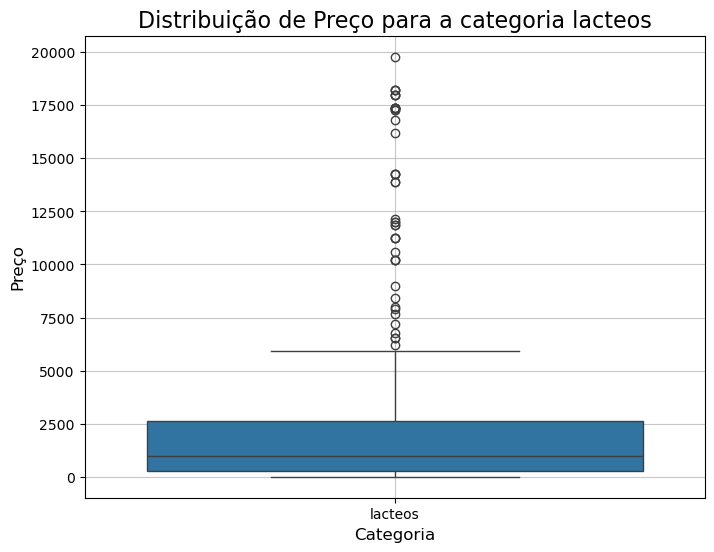

In [56]:
# separando a categoria com o maior valor de desvio padrão
cateoria_lacteos = df[df['Categoria'] == 'lacteos']


# tamanho do gráfico
plt.figure(figsize=(8, 6))

# Criando um boxplot 
sns.boxplot(x='Categoria', y='Preco_Normal', data=cateoria_lacteos)

# Adicionando título e labels
plt.title('Distribuição de Preço para a categoria lacteos', fontsize=16)
plt.xlabel('Categoria', fontsize=12)
plt.ylabel('Preço', fontsize=12)

# Exibindo o gráfico
plt.grid(True, linestyle='-', alpha=0.7)
plt.show()

In [57]:
cateoria_lacteos.describe()

,Preco_Normal,Preco_Desconto,Preco_Anterior,Desconto
count,447.000000,447.000000,447.000000,447.000000
mean,2385.219239,178.796421,88.959732,17.411633
std,3925.816164,799.619268,950.225783,212.466554
min,0.000000,0.000000,0.000000,0.000000
25%,269.000000,0.000000,0.000000,0.000000
50%,989.000000,0.000000,0.000000,0.000000
75%,2609.000000,0.000000,0.000000,0.000000
max,19788.000000,14550.000000,18899.000000,4349.000000


### Podemos ver que pelo gráfico a maior parte dos produtos lacteos estão concetrandos entre o Q1 e Q3, e de fato existem muitos outliers.

# 4 - Plote um gráfico de barras onde temos a média de descontos por categoria.

In [83]:
desc_por_categoria= df.groupby('Categoria')['Desconto'].mean().reset_index().sort_values(by='Desconto', ascending=True)

fig = px.bar(desc_por_categoria, x='Desconto', y='Categoria', orientation='h',
             title='Média de DESCONTO por CATEGORIA ',
             labels={'Desconto': 'Desconto Médio', 'Categoria': 'Categoria'},
             color='Desconto', 
             width=800) 

fig.show()


# 5 - Plote um gráfico de mapa interativo agrupando os dados por categoria, marca e trazendo a média de desconto.

In [86]:
# Agrupando e calculando a média
desc_por_categoria_marca = df.groupby(['Categoria', 'Marca'])['Desconto'].mean().reset_index()

# Filtrando os valores de desconto que são iguais a zero
desc_por_categoria_marca = desc_por_categoria_marca[desc_por_categoria_marca['Desconto'] > 0]

# Criando o gráfico de treemap
fig = px.treemap(desc_por_categoria_marca,
                 path=['Categoria', 'Marca'],
                 values='Desconto',
                 title="Média de Desconto por Categoria e Marca",
                 color='Desconto',
                 color_continuous_scale='Viridis') 

# Exibindo o gráfico
fig.show()